In [ ]:
!pip install --upgrade pandas-datareader
!pip install --upgrade pandas
!pip install arch

In [ ]:
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
start = datetime(2011,12,31)
end = datetime(2022,4,1)
stock_symbol = 'PG'

In [ ]:
data = web.DataReader(stock_symbol,'yahoo',start=start, end=end)

In [ ]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,67.000000,66.269997,66.300003,66.830002,11565900.0,49.155384
2012-01-04,66.879997,66.339996,66.629997,66.800003,10595400.0,49.133320
2012-01-05,66.650002,66.250000,66.440002,66.519997,10085300.0,48.927372
2012-01-06,66.629997,65.930000,66.510002,66.360001,8421200.0,48.809689
2012-01-09,66.750000,66.220001,66.250000,66.639999,7836100.0,49.015636
...,...,...,...,...,...,...
2022-03-29,156.470001,154.020004,155.369995,155.460007,5643400.0,155.460007
2022-03-30,154.429993,151.940002,152.500000,154.389999,5779300.0,154.389999
2022-03-31,154.339996,152.399994,154.100006,152.800003,7538600.0,152.800003


In [ ]:
returns = 100 * data.Close.pct_change().dropna()

Text(0.5, 1.0, 'PG returns')

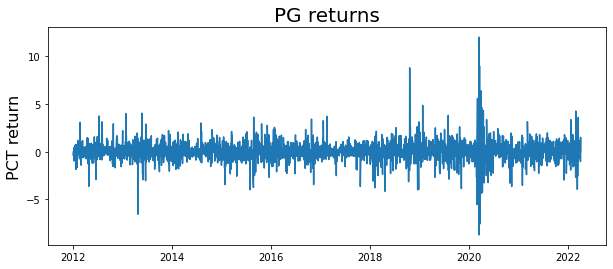

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('PCT return', fontsize=16)
plt.title('{} returns'.format(stock_symbol), fontsize=20)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


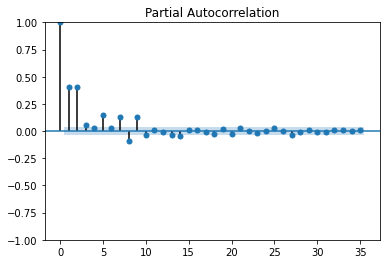

In [ ]:
plot_pacf(returns**2)
plt.show()

Going to fit GARCH(3, 3)

In [ ]:
model = arch_model(returns, p = 3, q = 3)

In [ ]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 3582.773483181834
Iteration:      2,   Func. Count:     24,   Neg. LLF: 3582.6076586491745
Iteration:      3,   Func. Count:     36,   Neg. LLF: 3580.9193723204216
Iteration:      4,   Func. Count:     47,   Neg. LLF: 3575.907498638436
Iteration:      5,   Func. Count:     58,   Neg. LLF: 3570.8388479532305
Iteration:      6,   Func. Count:     69,   Neg. LLF: 3568.1495994578645
Iteration:      7,   Func. Count:     80,   Neg. LLF: 3567.8492754928693
Iteration:      8,   Func. Count:     91,   Neg. LLF: 3567.6946079619793
Iteration:      9,   Func. Count:    102,   Neg. LLF: 3567.5295317123196
Iteration:     10,   Func. Count:    113,   Neg. LLF: 3567.4972971726
Iteration:     11,   Func. Count:    124,   Neg. LLF: 3567.4761196467607
Iteration:     12,   Func. Count:    134,   Neg. LLF: 3567.4011585573344
Iteration:     13,   Func. Count:    144,   Neg. LLF: 3567.397296344648
Iteration:     14,   Func. Count:    154,   Neg. LLF: 356

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3567.40
Distribution:                  Normal   AIC:                           7150.79
Method:            Maximum Likelihood   BIC:                           7197.64
                                        No. Observations:                 2580
Date:                Sun, Apr 03 2022   Df Residuals:                     2579
Time:                        06:50:36   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0531  1.880e-02      2.824  4.742e-03 [1.625e-02,8.995e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2989      0.137      2.181  2.915e-02  [3.035e-02,  0.567]
alpha[1]       0.2045  7.439e-02      2.750  5.967e-03  [5.873e-02,  0.350]
alpha[2]       0.1364      0.104      1.308      0.191 [-6.794e-02,  0.341]
alpha[3]       0.0511  8.695e-02      0.587      0.557    [ -0.119,  0.221]
beta[1]    7.0279e-13      0.374  1.881e-12      1.000    [ -0.732,  0.732]
beta[2]        0.0655      0.247      0.265      0.791    [ -0.419,  0.550]
beta[3]        0.2815      0.171      1.644      0.100 [-5.405e-02,  0.617]
===========================================================================

Covariance estimator: robust
"""

Beta values are insignificant - so going to try ARCH(3)

In [ ]:
model2 = arch_model(returns, p = 3, q = 0)

In [ ]:
model2_fit = model2.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3641.9044179531998
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3636.3803578784155
Iteration:      3,   Func. Count:     27,   Neg. LLF: 3625.163923319918
Iteration:      4,   Func. Count:     35,   Neg. LLF: 3603.5358481235253
Iteration:      5,   Func. Count:     43,   Neg. LLF: 3599.5857870043246
Iteration:      6,   Func. Count:     51,   Neg. LLF: 3598.187032729585
Iteration:      7,   Func. Count:     59,   Neg. LLF: 3596.890175632433
Iteration:      8,   Func. Count:     67,   Neg. LLF: 3588.507636420866
Iteration:      9,   Func. Count:     74,   Neg. LLF: 3587.921520502906
Iteration:     10,   Func. Count:     81,   Neg. LLF: 3587.0256525420887
Iteration:     11,   Func. Count:     88,   Neg. LLF: 3586.5704898762474
Iteration:     12,   Func. Count:     95,   Neg. LLF: 3586.5599908476515
Iteration:     13,   Func. Count:    102,   Neg. LLF: 3586.5593654264444
Iteration:     14,   Func. Count:    109,   Neg. LLF: 35

In [ ]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3586.56
Distribution:                  Normal   AIC:                           7183.12
Method:            Maximum Likelihood   BIC:                           7212.40
                                        No. Observations:                 2580
Date:                Sun, Apr 03 2022   Df Residuals:                     2579
Time:                        06:50:42   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0501  1.917e-02      2.615  8.925e-03 [1.256e-02,8.771e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5668  4.943e-02     11.468  1.920e-30   [  0.470,  0.664]
alpha[1]       0.2345  7.303e-02      3.211  1.323e-03 [9.136e-02,  0.378]
alpha[2]       0.1616  4.019e-02      4.021  5.791e-05 [8.285e-02,  0.240]
alpha[3]       0.1085  4.130e-02      2.627  8.605e-03 [2.756e-02,  0.189]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
  train = returns[:-(test_size-i)]
  model = arch_model(train, p = 3, q = 0)
  model_fit = model.fit(disp='off')
  pred = model_fit.forecast(horizon=1)
  rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

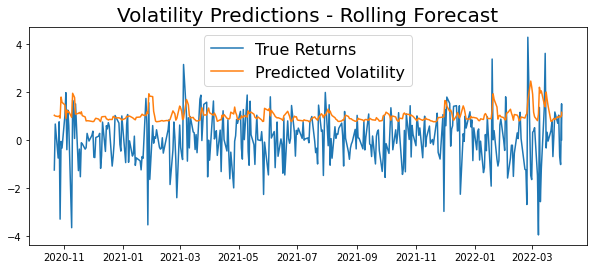

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Predictions - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Text(0.5, 1.0, 'Volatility Prediction - Next 30 Days')

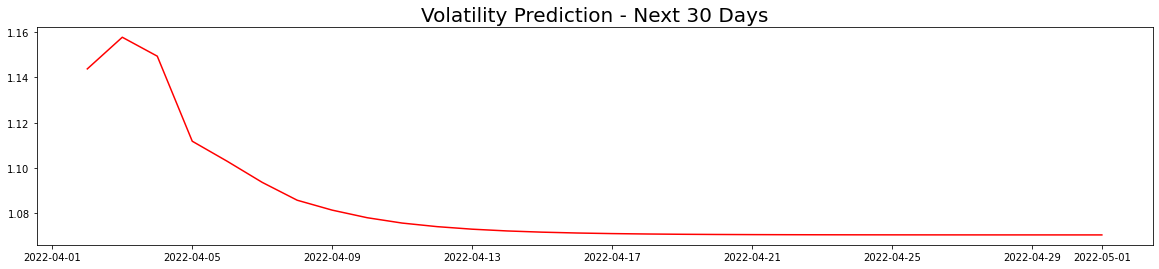

In [ ]:
pred = model_fit.forecast(horizon=30)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range (1,31)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)
plt.figure(figsize=(20, 4))
plt.plot(pred, color='red')
plt.title('Volatility Prediction - Next 30 Days', fontsize=20)

In [ ]:
data['Log returns'] = np.log(data['Close']/data['Close'].shift())

In [ ]:
data['Log returns'].std()

0.01114469842217166

In [ ]:
volatility = data['Log returns'].std()*252**.5

In [ ]:
str_vol = str(round(volatility, 4)*100)

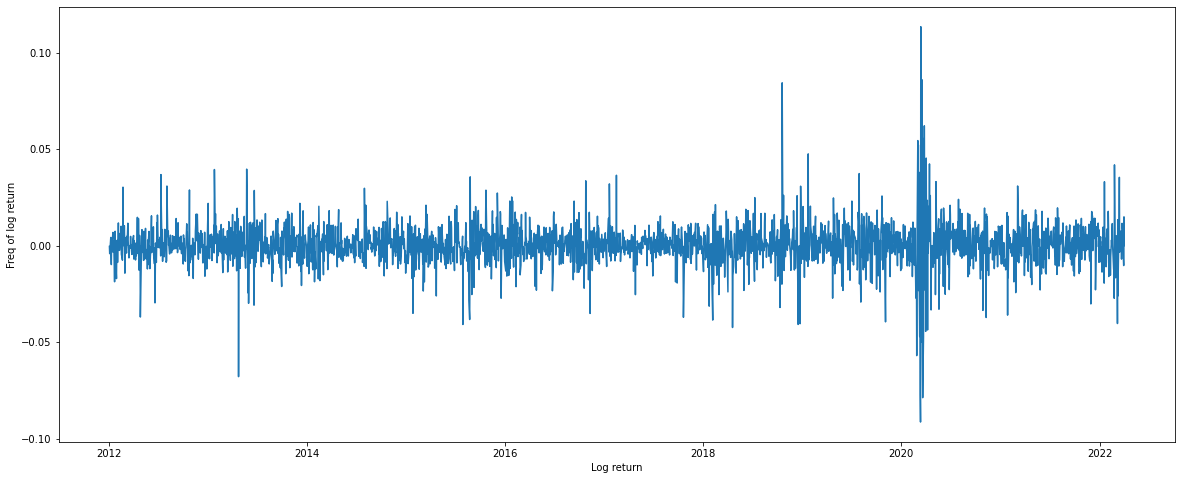

In [ ]:
plt.figure(figsize=(20,8))
plt.xlabel("Log return")
plt.ylabel("Freq of log return")
plt.plot(data['Log returns'])
# plt.plot(rolling_predictions, color='orange')
plt.show()

In [ ]:
import numpy as np
from scipy.stats import norm
import scipy.optimize as opt
import pandas as pd
import datetime
import time
from arch import arch_model
import matplotlib.pyplot as plt
from numba import jit
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')

In [ ]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2022, 4, 1)

In [ ]:
data = web.DataReader('PG','yahoo',start=start, end=end)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,61.310001,60.630001,61.110001,61.119999,9190800.0,42.245068
2010-01-05,61.279999,60.599998,61.130001,61.139999,8649400.0,42.258888
2010-01-06,60.959999,60.500000,60.939999,60.849998,9908400.0,42.058445
2010-01-07,60.700001,60.240002,60.580002,60.520000,8972800.0,41.830341
2010-01-08,60.529999,60.060001,60.360001,60.439999,8464600.0,41.775063
...,...,...,...,...,...,...
2022-03-29,156.470001,154.020004,155.369995,155.460007,5643400.0,155.460007
2022-03-30,154.429993,151.940002,152.500000,154.389999,5779300.0,154.389999
2022-03-31,154.339996,152.399994,154.100006,152.800003,7538600.0,152.800003


In [ ]:
ret = 100 * (data.pct_change()[1:]['Adj Close']) 
realized_vol = ret.rolling(5).std()

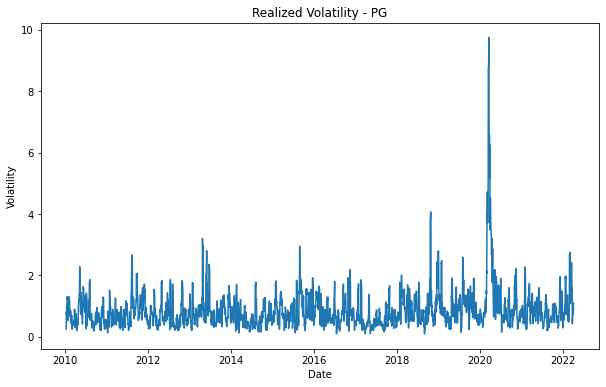

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol.index,realized_vol)
plt.title('Realized Volatility - {}'.format(stock_symbol))
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.show()

In [ ]:
n = 252
from sklearn.svm import SVR
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
realized_vol = ret.rolling(5).std()
realized_vol = pd.DataFrame(realized_vol)
realized_vol.reset_index(drop=True, inplace=True)

In [ ]:
returns_svm = ret ** 2
returns_svm = returns_svm.reset_index()
del returns_svm['Date']

In [ ]:
X = pd.concat([realized_vol, returns_svm], axis=1, ignore_index=True)
X = X[4:].copy()
X = X.reset_index()
X.drop('index', axis=1, inplace=True)

In [ ]:
realized_vol = realized_vol.dropna().reset_index()
realized_vol.drop('index', axis=1, inplace=True)

In [ ]:
svr_poly = SVR(kernel='poly', degree=2)
svr_lin = SVR(kernel='linear')
svr_rbf = SVR(kernel='rbf')

In [ ]:
para_grid = {'gamma': sp_rand(),
                      'C': sp_rand(),
                      'epsilon': sp_rand()}
clf = RandomizedSearchCV(svr_lin, para_grid)
clf.fit(X.iloc[:-n].values,
        realized_vol.iloc[1:-(n-1)].values.reshape(-1,))
predict_svr_lin = clf.predict(X.iloc[-n:])

In [ ]:
predict_svr_lin = pd.DataFrame(predict_svr_lin)
predict_svr_lin.index = ret.iloc[-n:].index

In [ ]:
rmse_svr = np.sqrt(mse(realized_vol.iloc[-n:] / 100, predict_svr_lin / 100))

In [ ]:
print('The RMSE value of SVR with Linear Kernel is {:.6f}'.format(rmse_svr))

The RMSE value of SVR with Linear Kernel is 0.000985


In [ ]:
realized_vol.index = ret.iloc[4:].index

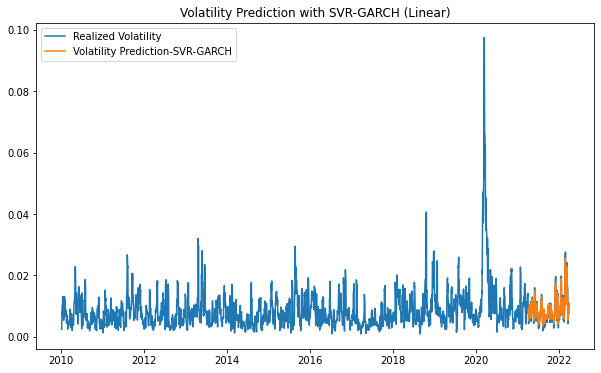

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol / 100, label='Realized Volatility')
plt.plot(predict_svr_lin / 100, label='Volatility Prediction-SVR-GARCH')
plt.title('Volatility Prediction with SVR-GARCH (Linear)', fontsize=12)
plt.legend()
plt.show()